## Concise: 1: Start and mesh
Author: yanjun zhang, Source from book "Abali - 2017 - Computational Reality" P119

DOLFINx version: 0.8.0
Simulation environment setup complete.
1: Total braking tims is  48.05 s
2: Total numb steps is  62
The file 'm-3-3.msh' exists, start creat now:

1: Progress: 0.8%. Use time:             54 s. Start: 2025-01-21 15:09:08
.     ,
Rub radius square is  [18.76586513 18.88709495 18.87930522 18.78081828 18.86616052 18.71757327
 18.55496768 18.54360987 18.79407451 18.80083191 18.88764122 18.76071785
 18.72853099 18.78373417 18.48990621 18.70272035 18.5852128  18.76939394]
1: Progress: 1.7%. Use time:             56 s. Start: 2025-01-21 15:09:08
.     ,
Rub radius square is  [17.87369558 19.49767824 19.52887677 17.88925501 19.51196627 17.91607189
 17.91515542 17.9139701  17.91607189 19.52484539 19.49766171 17.91413396
 17.98236628 17.88702498 17.89788778 17.89788778 17.90526375 17.87181248]
1: Progress: 2.5%. Use time:             0 hours 2 min. Start: 2025-01-21 15:09:08.,
Rub radius square is  [17.87369558 19.49767824 19.52887677 17.88925501 19.51196627 17.91607189
 1

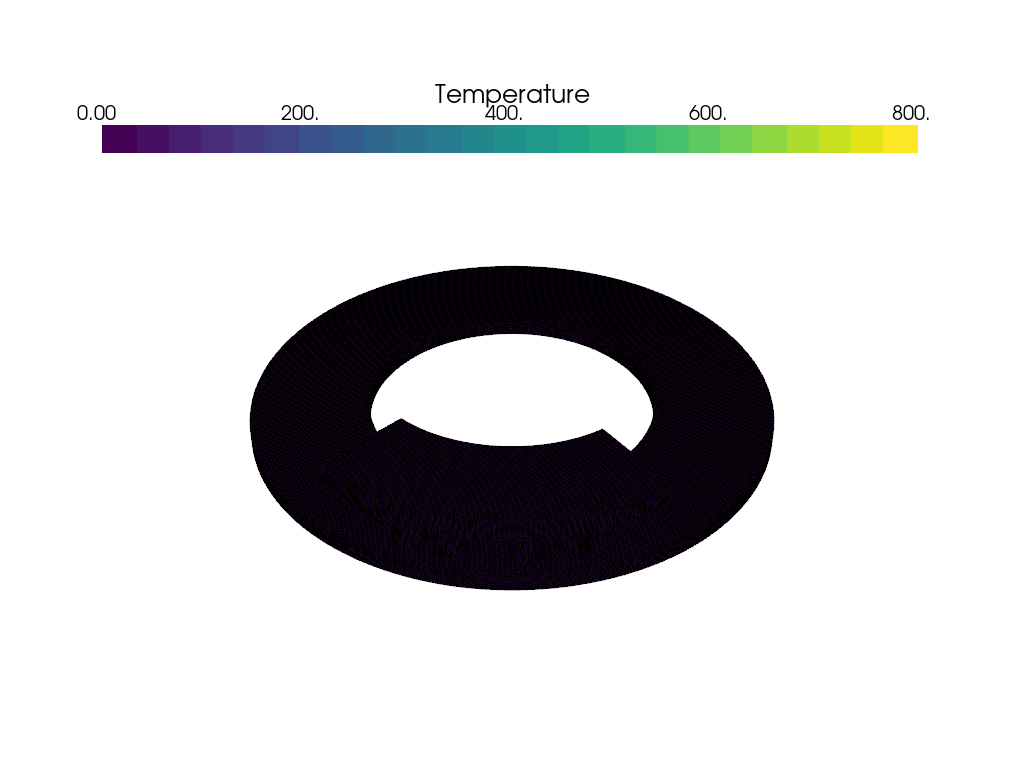

In [1]:
from disc_f_wear import *

# mesh-size, contact area coefficient
mesh_min, mesh_max = 3, 3
c_contact          = 1

# Each time step rotation angular, and acc during lag, 1 is full acc, 0 is no acc.
angular_r          = 2240
v_vehicle, c_acc   = 160, 1
z1,z2,z3,z4,z_all  = 20,33,30,83,8
pad_v_tag          = 32
alpha_thermal      = 1.5e-6 #thermal expansion coefficient
penalty_param      = 400
k_wear             = 6.7e-6/100
wear_f             = 'off'   # on is open for wear calcualtion on deformation
# calling local functions to get all parameters
(dt, P, g, num_steps, h, radiation, v_angular, \
 Ti, Tm, S_rub_circle_ini, t, rho, c, k, t_brake, 
S_total,)                                       = vehicle_initial (angular_r, v_vehicle, c_contact, c_acc)
print("1: Total braking tims is ", round(sum(dt), 2), "s")
print("2: Total numb steps is ", num_steps)

## here use lots of abbreviation, details are in disc_f
domain, cell_markers, facet_markers, mesh_name, mesh_name1, mesh_name2 \
                       = mesh_brake_all(mesh_min,mesh_max,pad_v_tag)

V, T_init, u_n         = initial_u_n(domain, Ti)

fdim, bc, mesh_brake, all_e,xdmf, x_co, y_co, ds, b_con \
                       = mesh_setup( domain, V, mesh_name1, num_steps, \
                         angular_r, mesh_name2, c_contact, z_all, Tm, S_rub_circle_ini)
# Initialize
problem, u, v, f, n_vector = variation_initial(V, T_init, domain, rho, c, b_con,\
                          radiation, h, k, xdmf, dt, ds, u_n, Tm,g,bc);
solver_setup_solve(problem,u)

## Visualization of time dependent problem using pyvista
gif_name    = "T-s-{}-d-{}-{}-c-{}-e-{}.gif".format(num_steps, angular_r, mesh_name2, c_contact, all_e)
plotter, sargs, renderer, warped, viridis, grid = plot_gif(V,u,gif_name)
##solve
num_steps= int(num_steps)
#num_steps= int(10)
 
###################################################################
x_co_zone   = 0.00001

T_array,fraction_c,deformed_co,u_d1, d_wear   = solve_heat(Ti, u, num_steps, dt, x_co, y_co, angular_r, \
               t_brake, domain, S_rub_circle_ini, fdim,\
               rho, c, v, radiation, k, h, f, Tm, g,\
               ds, xdmf, b_con, bc, plotter, warped,\
               mesh_name1, mesh_brake, pad_v_tag, z4,\
               z1, x_co_zone, u_n, alpha_thermal, penalty_param, P, k_wear, wear_f)  #last u should be u_n, here we set u, \
#the same with previous:solver_setup_solve(problem,u)
####################################################################

csv_name    = "Result_T-s-{}-d-{}-{}-c-{}-e-{}.csv".format(num_steps, angular_r, mesh_name2, c_contact, all_e  )
save_t_T(csv_name, T_array) # got the Temperature data

from IPython.display import display, Image
display(Image(gif_name))

The wear depeth is 0.006260702171999999 mm


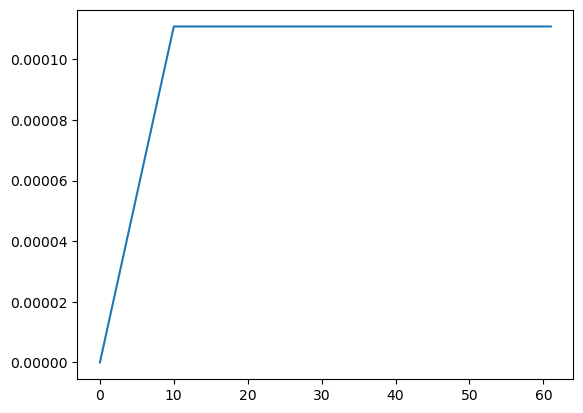

In [2]:
print( "The wear depeth is", sum(d_wear), "mm" )
plt.plot(d_wear)

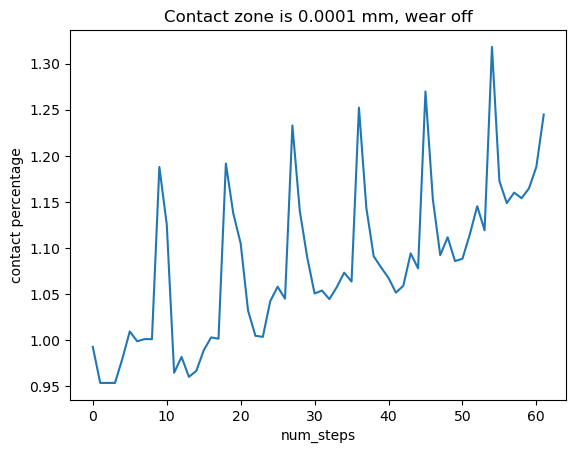

In [3]:
plt.plot(fraction_c)
plt.title (f"Contact zone is {x_co_zone} mm, wear {wear_f}")
#plt.ylim(0,1.5)
plt.xlabel("num_steps")
plt.ylabel("contact percentage")
plt.savefig("new_figure.png")

In [4]:
print(fraction_c)

[0.9928705843334424, 0.9537650379009208, 0.9537650379088857, 0.9537650379090205, 0.9800645747776481, 1.009629057672759, 0.998933051703537, 1.0012728957097994, 1.0012737964818097, 1.1879680235526895, 1.1257781423790099, 0.964781824531296, 0.9819306494724384, 0.9603450731326586, 0.9668130284781142, 0.9890116963448612, 1.0031365334456184, 1.0017113788361827, 1.1916377867198318, 1.1377185089470516, 1.105017324674607, 1.0321725960292174, 1.0048249127394822, 1.0037033104330055, 1.0423067695250297, 1.058113592499561, 1.0451166991371772, 1.2329458246487275, 1.1401809443283737, 1.0901187750024082, 1.0507633372473517, 1.0539387591321019, 1.0446127790619795, 1.0575714412023358, 1.0733219804875929, 1.063709758218513, 1.252279444617122, 1.143699679903956, 1.0910601095770984, 1.0789381001519451, 1.0676328734788305, 1.051648676547566, 1.059075950653513, 1.0942278426767853, 1.077975818234621, 1.269789197978102, 1.152909484219284, 1.0922816054351607, 1.1117266340791867, 1.0858833434612778, 1.0884008879